Data Visualization
(3621, 5)
(3621, 5)


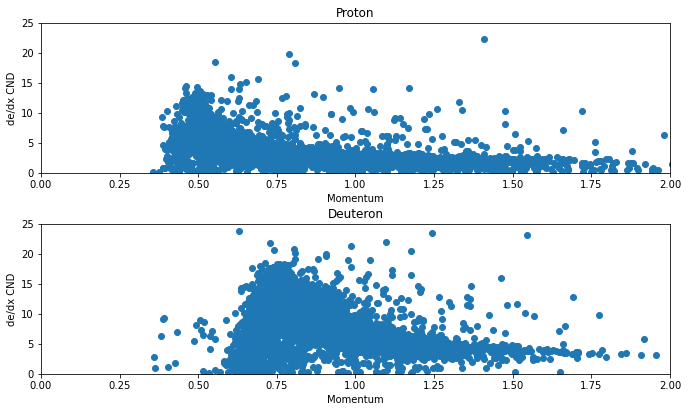

In [21]:
import pandas as pd
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt


print("Data Visualization")
proton = pd.read_csv('Proton.csv',index_col=False)
proton1 = proton.loc[(proton["dedxCND"] > 0) ]

proton1 = proton1.iloc[:3621,:] # for ctof use 5705 for CND use 3621
print(proton1.shape)


deuteron = pd.read_csv('Deuteron.csv',index_col=False)
deuteron1 = deuteron.loc[(deuteron["dedxCND"] > 0)]

deuteron1 = deuteron1.iloc[:3621,:] # for ctof use 5705 for CND use 3621
print(proton1.shape)

fig, axs = plt.subplots(2, figsize=(10, 6))

fig.tight_layout(pad=3.0)


axs[0].scatter(x=proton1['momentum'], y=proton1['dedxCND'])
axs[0].set_xlim([0,2])
axs[0].set_ylim([0,25])

axs[0].set_xlabel("Momentum")
axs[0].set_ylabel("de/dx CND")
axs[0].set_title("Proton")



axs[1].scatter(x=deuteron1['momentum'], y=deuteron1['dedxCND'])
axs[1].set_xlim([0,2])
axs[1].set_ylim([0,25])

axs[1].set_xlabel("Momentum")
axs[1].set_ylabel("de/dx CND")
axs[1].set_title("Deuteron")
# df1 = pd.read_csv('Deuteron.csv',index_col=False)
# df2 = pd.read_csv('Proton.csv',index_col=False)
# #this is a test change
# df1 = df1.loc[(df1["dedxCND"] > 0) ]
# df2 = df2.loc[(df2["dedxCND"] > 0) ]
# df2= df2.iloc[:3621,:]
# dftotal = df1.append(df2)


# plt.scatter(dftotal.iloc[:,3],dftotal.iloc[:,2],c=dftotal.iloc[:,4])
# plt.ylim(0,1)
# plt.xlim(0,2)



plt.show()

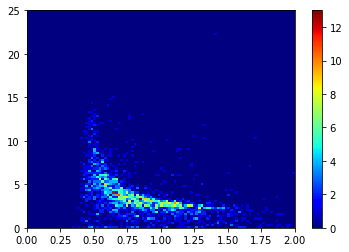

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt

df = pd.read_csv('Proton.csv',index_col=False)
df = df.iloc[:3621,:]
# df.head
# x=[]
# y=[]


    
# x = np.array(df.iloc[:, 0:1])
# y = np.array(df.iloc[:, 2:3])
# print(x)

x = []
for i in df['momentum']:
    x.append(i)
    
y=[]
for i in df['dedxCND']:
    y.append(i)




plt.hist2d(x, y, bins=(100,100), cmap=plt.cm.jet,range=[[0,2],[0,25]])
plt.colorbar()
plt.show()


# ax = df.plot.scatter(x="momentum", y="dedxCTOF",cmap="viridis")
# ax.set_xlim([0,4])
# ax.set_ylim([0,10])

# plt.show()

(5705, 5)
(5705, 5)
(11410, 5)
       dedxCTOF    dedxCND  momentum
0      4.616847   4.421792  1.493563
1      8.212157   6.298386  0.949961
2     10.138301   9.419437  0.900802
4     10.882942  11.187849  0.772999
5     11.007471  10.287978  0.821828
...         ...        ...       ...
5762   8.351039   2.144160  0.532487
5763   3.293792   2.731182  0.861477
5765  13.469112   2.923042  0.456809
5766   6.221066   4.438257  0.585056
5768  11.514943   6.528781  0.449436

[7033 rows x 3 columns]
0       1
1       1
2       1
4       1
5       1
       ..
5762    0
5763    0
5765    0
5766    0
5768    0
Name: particle, Length: 7033, dtype: int64
[[324  13]
 [  4 354]]
0.9755395683453237


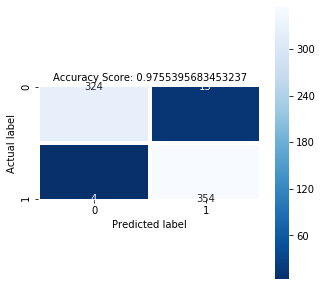

In [19]:
import pandas as pd
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler



deuteron = pd.read_csv('Deuteron.csv',index_col=False)
deuteron = deuteron.loc[(deuteron["dedxCTOF"] > 0) ]
# deuteron = deuteron.loc[(deuteron["dedxCND"] > 0) ]
print(deuteron.shape)
proton = pd.read_csv('Proton.csv',index_col=False)
proton = proton.loc[(proton["dedxCTOF"] > 0) ]
# proton = proton.loc[(proton["dedxCND"] > 0) ]
proton= proton.iloc[:5705,:]
print(proton.shape)
totalData = deuteron.append(proton)

print(totalData.shape)



totalData = totalData.drop('beta',1)
# totalData = totalData.drop('dedxCND',1)
totalData = totalData.loc[(totalData["dedxCND"] > 0) ]
totalData.shape
X = totalData.iloc[:, 0:3:1]
print(X)

y = totalData.iloc[:, -1]
print(y)
training_dataX = X.sample(frac=0.8, random_state=25)
training_datay = y.sample(frac=0.8, random_state=25)
testing_dataX = X.drop(training_dataX.index)
testing_datay = y.drop(training_datay.index)

"""
Standard scaller
"""

scaler = StandardScaler()
scaler.fit(training_dataX)


training_dataX = scaler.transform(training_dataX)
testing_dataX = scaler.transform(testing_dataX)

"""
Standard scaller
"""

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(training_dataX, training_datay)
y_pred = neigh.predict(testing_dataX)


predictions = neigh.predict(testing_dataX)
score = neigh.score(testing_dataX, testing_datay)
cm = metrics.confusion_matrix(testing_datay, predictions)
print(cm)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=3, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10)

print(metrics.accuracy_score(testing_datay,y_pred))




(3614, 5)
(7228, 5)
this is x
       dedxCTOF    dedxCND  momentum
0      4.616847   4.421792  1.493563
1      8.212157   6.298386  0.949961
2     10.138301   9.419437  0.900802
4     10.882942  11.187849  0.772999
5     11.007471  10.287978  0.821828
...         ...        ...       ...
6073   4.510035   4.168107  0.665312
6075   2.389111   1.883193  1.379191
6076   2.611511   1.359699  1.165654
6077   4.141550   3.958481  0.758493
6082   4.338264   2.266301  0.825358

[7228 rows x 3 columns]
0       1
1       1
2       1
4       1
5       1
       ..
6073    0
6075    0
6076    0
6077    0
6082    1
Name: particle, Length: 7228, dtype: int64
0.9172320217096337
[[330  41]
 [ 20 346]]
[-12.22052452]
[[0.48653037 0.46994679 6.87059849]]


/Users/nicholasrichardson/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


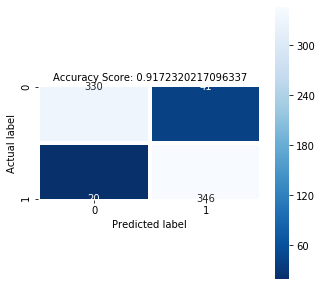

In [21]:
from sklearn.linear_model import LogisticRegression
#this is the good one where I do logistic regression for the new data i got

import pandas as pd
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

deuteron = pd.read_csv('Deuteron.csv',index_col=False)
proton = pd.read_csv('Proton.csv',index_col=False)
deuteron.head
deuteron = deuteron.loc[(deuteron["dedxCTOF"] > 0)]
proton = proton.loc[(proton["dedxCTOF"] > 0)]
deuteron = deuteron.loc[(deuteron["dedxCND"] > 0)]
proton = proton.loc[(proton["dedxCND"] > 0)]

print(deuteron.shape)


proton= proton.iloc[:3614,:]
# print(proton.shape)
totalData = deuteron.append(proton)
print(totalData.shape)
totalData = totalData.drop('beta',1)
#totalData = totalData.drop('dedxCND',1)
totalData.head
X = totalData.iloc[:,0:3:1]
print("this is x")
print(X) 
y = totalData.iloc[:, -1]
print(y)
# X = (X-X.min())/(X.max()-X.min())
training_dataX = X.sample(frac=0.8, random_state=25)

training_datay = y.sample(frac=0.8, random_state=25)

testing_dataX = X.drop(training_dataX.index)
testing_datay = y.drop(training_datay.index)

clf = LogisticRegression(random_state=1).fit(training_dataX, training_datay)

# print(clf.predict(testing_dataX))
# print(clf.predict_proba(testing_dataX))
print(clf.score(testing_dataX, testing_datay))
predictions = clf.predict(testing_dataX)
score = clf.score(testing_dataX, testing_datay)
cm = metrics.confusion_matrix(testing_datay, predictions)
print(cm)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=3, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10)


print(clf.intercept_)
print(clf.coef_)


(3029589, 6)
60473
average chi2 7.173509359009185


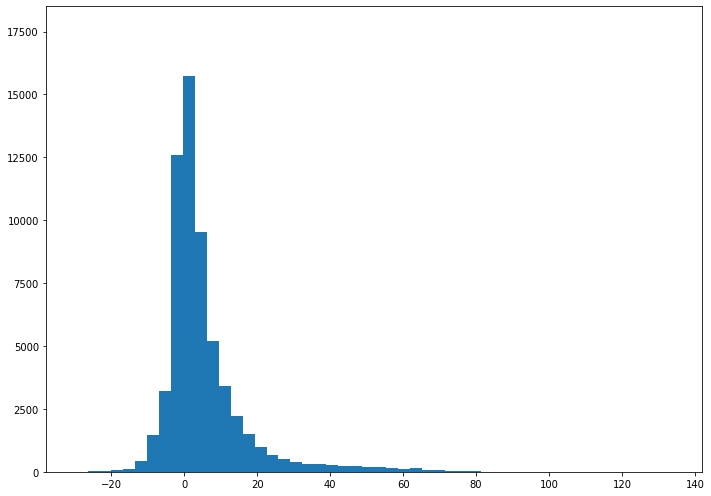

In [29]:
##Testing the model on real data
import pandas as pd
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import math

deuteron = pd.read_csv('RealData.csv',index_col=False)
deuteron = deuteron.loc[(deuteron["dedxCTOF"] > 0)]
deuteron = deuteron.loc[(deuteron["dedxCND"] > 0)]
numProtons=0
print(deuteron.shape)
chi2 = 0
chi2array = []
for i in range(100000):
    # value = deuteron.iloc[i,0]*0.486 +deuteron.iloc[i,1]*0.469 + deuteron.iloc[i,3]*6.87 -12.22
    value = deuteron.iloc[i,0]*0.3241  + deuteron.iloc[i,3]*2.2909 - 4.58

    value = 1 / (1+math.e**(-value))
    if (value > 0.5):
        numProtons+=1
        chi2 += abs(deuteron.iloc[i,4])
        chi2array.append((deuteron.iloc[i,4]))
        # print("Prediction:", value, " Chi2pid" , deuteron.iloc[i,4])
        
print(numProtons)
print("average chi2", chi2/numProtons)


n_bins = 50

fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
axs.set_ylim([0,18500]) 
axs.hist(chi2array, bins = n_bins)
 
# Show plot
plt.show()

(3614, 5)
this is x
       dedxCTOF    dedxCND  momentum
0      4.616847   4.421792  1.493563
1      8.212157   6.298386  0.949961
2     10.138301   9.419437  0.900802
4     10.882942  11.187849  0.772999
5     11.007471  10.287978  0.821828
...         ...        ...       ...
6073   4.510035   4.168107  0.665312
6075   2.389111   1.883193  1.379191
6076   2.611511   1.359699  1.165654
6077   4.141550   3.958481  0.758493
6082   4.338264   2.266301  0.825358

[7228 rows x 3 columns]
0.9823609226594301
[[361  10]
 [  3 363]]
Accuracy: 0.9823609226594301


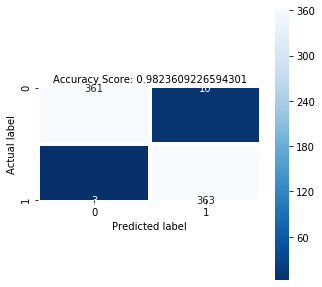

In [16]:
import pandas as pd
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
#first attempt at random forest

deuteron = pd.read_csv('Deuteron.csv',index_col=False)
proton = pd.read_csv('Proton.csv',index_col=False)
deuteron.head
deuteron = deuteron.loc[(deuteron["dedxCTOF"] > 0)]
proton = proton.loc[(proton["dedxCTOF"] > 0)]
deuteron = deuteron.loc[(deuteron["dedxCND"] > 0)]
proton = proton.loc[(proton["dedxCND"] > 0)]

print(deuteron.shape)


proton= proton.iloc[:3614,:]
# print(proton.shape)
totalData = deuteron.append(proton)

totalData = totalData.drop('beta',1)
# totalData = totalData.drop('dedxCND',1)
totalData.head
X = totalData.iloc[:,0:3:1]
print("this is x")
print(X)
y = totalData.iloc[:, -1]

# X = (X-X.min())/(X.max()-X.min())
training_dataX = X.sample(frac=0.8, random_state=25)

training_datay = y.sample(frac=0.8, random_state=25)

testing_dataX = X.drop(training_dataX.index)
testing_datay = y.drop(training_datay.index)

clf=RandomForestClassifier(n_estimators=100)

clf.fit(training_dataX,training_datay)

print(clf.score(testing_dataX, testing_datay))
predictions = clf.predict(testing_dataX)
score = clf.score(testing_dataX, testing_datay)
cm = metrics.confusion_matrix(testing_datay, predictions)
print(cm)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=3, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10)



# Model Accuracy, how often is the classifier correct?
y_pred=clf.predict(testing_dataX)
print("Accuracy:",metrics.accuracy_score(testing_datay, y_pred))





In [4]:
from sklearn.linear_model import LogisticRegression
#this is the good one where I do logistic regression for the new data i got

"""
I am trying to use scaling here
"""

import pandas as pd
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


deuteron = pd.read_csv('Deuteron.csv',index_col=False)
proton = pd.read_csv('Proton.csv',index_col=False)
deuteron.head
# deuteron = deuteron.loc[(deuteron["dedxCND"] > 0)]
# proton = proton.loc[(proton["dedxCND"] > 0)]


print(deuteron.shape)


proton= proton.iloc[:5750,:]
# print(proton.shape)
totalData = deuteron.append(proton)
print(totalData.shape)
totalData = totalData.drop('beta',1)
totalData = totalData.drop('dedxCND',1)
totalData.head

X = totalData.iloc[:,0:2:1]
print("this is x")
print(X) 
y = totalData.iloc[:, -1]

training_dataX = X.sample(frac=0.8, random_state=25)

training_datay = y.sample(frac=0.8, random_state=25)

testing_dataX = X.drop(training_dataX.index)
testing_datay = y.drop(training_datay.index)

scaler = StandardScaler()
scaler.fit(training_dataX)


training_dataX = scaler.transform(training_dataX)
testing_dataX = scaler.transform(testing_dataX)



# totalData.head



# print(y)
# X = (X-X.min())/(X.max()-X.min())


clf = LogisticRegression(random_state=0).fit(training_dataX, training_datay)

# print(clf.predict(testing_dataX))
# print(clf.predict_proba(testing_dataX))
print(clf.score(testing_dataX, testing_datay))

print(clf.intercept_)
print(clf.coef_)

(5750, 5)
(11500, 5)
this is x
       dedxCTOF  momentum
0      4.616847  1.493563
1      8.212157  0.949961
2     10.138301  0.900802
3     14.305717  0.472008
4     10.882942  0.772999
...         ...       ...
5745   3.599012  0.898550
5746   8.095700  0.501445
5747   3.976654  0.788739
5748   3.026341  1.174281
5749  12.038745  0.444255

[11500 rows x 2 columns]
0.8209606986899564
[-4.18721498]
[[0.30058963 2.05941615]]


/Users/nicholasrichardson/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
